# Chapter 8 翻译和总结
吴心远翻译和总结。
文档来源：《Chapter 8 Getting Started with Pandas》

## Pandas的优势

可以管理数据和可视化数据。

## 安装Pandas

cmd中输入：

pip3 install pandas

导入库。

In [2]:
import pandas as pd

## Pandas基础介绍

用`pd.Series()`创建`Series`类型。

可以观察到，可以将列表传递入`pd.Series()`创建`Series`类型。

In [3]:
import numpy as np

s1 = pd.Series([1, 2, 3 , 5, -3])

print (type(s1))

print(s1)

s2 = pd.Series([1, 2, 3 , 5, -3], dtype=np.int32)
print(s2)

x = [1, 2, 3 , 5, -3]
s3 = pd.Series(x)

<class 'pandas.core.series.Series'>
0    1
1    2
2    3
3    5
4   -3
dtype: int64
0    1
1    2
2    3
3    5
4   -3
dtype: int32


甚至可以接受一个`NumPy ndarray`。

In [4]:
y = np.array(x)
s4 = pd.Series(y)
print (s4.values)
print (s4.index)

[ 1  2  3  5 -3]
RangeIndex(start=0, stop=5, step=1)


也可以自定义`index`。

In [5]:
s5 = pd.Series( x, index = ['a', 'b', 'c', 'd', 'e'])
print(s5)

a    1
b    2
c    3
d    5
e   -3
dtype: int64


## 简单的运算

比较大小。

In [6]:
print (s5[s5.values<0])
print (s5[s5.index>'a'])

e   -3
dtype: int64
b    2
c    3
d    5
e   -3
dtype: int64


每一个数都进行改变。

In [7]:
print (s5*3)

a     3
b     6
c     9
d    15
e    -9
dtype: int64


## Pandas的数据处理

`Dataframe`类型。

可以从字典开始创建。

In [8]:
data = {'city': ['Mumbai', 'Mumbai', 'Mumbai','Hyderabad', 'Hyderabad', 'Hyderabad'],'year': [2010, 2011, 2012, 2010, 2011, 2012,],'population': [10.0, 10.1, 10.2, 5.2, 5.3, 5.5]}
df1 = pd.DataFrame(data)
print(df1)

        city  year  population
0     Mumbai  2010        10.0
1     Mumbai  2011        10.1
2     Mumbai  2012        10.2
3  Hyderabad  2010         5.2
4  Hyderabad  2011         5.3
5  Hyderabad  2012         5.5


也可以自定义行列名称。

改变`columns`如果没有对应的字典`key`会显示`NaN`。改变`index`就不会。

In [9]:
df3 = pd.DataFrame(data, columns=['year', 'city', 'population', 'GDP'],index = ['one', 'two', 'three', 'four', 'five', 'six'])
print (df3)

       year       city  population  GDP
one    2010     Mumbai        10.0  NaN
two    2011     Mumbai        10.1  NaN
three  2012     Mumbai        10.2  NaN
four   2010  Hyderabad         5.2  NaN
five   2011  Hyderabad         5.3  NaN
six    2012  Hyderabad         5.5  NaN


要输出某一个部分，可以使用如下的方式。

In [10]:
print (df3['year'])
print (df3['year']['one'])
print (df3.loc['one'])
print (df3.loc['one']['year'])

one      2010
two      2011
three    2012
four     2010
five     2011
six      2012
Name: year, dtype: int64
2010
year            2010
city          Mumbai
population      10.0
GDP              NaN
Name: one, dtype: object
2010


要赋值，由多种方式。

In [11]:
df3.GDP = 10
print(df3)

df3.GDP = np.arange(6)
print(df3)

df3.GDP = [3, 2, 0, 9, -0.4, 7]
print(df3)

val = pd.Series([-1.4, 1.5, -1.3], index=['two', 'four', 'five'])
df3.GDP = val
print(df3)

       year       city  population  GDP
one    2010     Mumbai        10.0   10
two    2011     Mumbai        10.1   10
three  2012     Mumbai        10.2   10
four   2010  Hyderabad         5.2   10
five   2011  Hyderabad         5.3   10
six    2012  Hyderabad         5.5   10
       year       city  population  GDP
one    2010     Mumbai        10.0    0
two    2011     Mumbai        10.1    1
three  2012     Mumbai        10.2    2
four   2010  Hyderabad         5.2    3
five   2011  Hyderabad         5.3    4
six    2012  Hyderabad         5.5    5
       year       city  population  GDP
one    2010     Mumbai        10.0  3.0
two    2011     Mumbai        10.1  2.0
three  2012     Mumbai        10.2  0.0
four   2010  Hyderabad         5.2  9.0
five   2011  Hyderabad         5.3 -0.4
six    2012  Hyderabad         5.5  7.0
       year       city  population  GDP
one    2010     Mumbai        10.0  NaN
two    2011     Mumbai        10.1 -1.4
three  2012     Mumbai        10.2  NaN


## 读取表格（CSV格式）

In [12]:
'''df = pd.read_csv('https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv')
df.head(5)'''
# 不过我觉得读取可能有问题。

"df = pd.read_csv('https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv')\ndf.head(5)"

## 可视化

引入库。

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

开始举例。

首先随机化出一个数据集。

In [14]:
ts = pd.Series(np.random.randn(5))
print (ts)

0   -0.958930
1   -1.286668
2    1.657793
3   -1.220202
4    1.684251
dtype: float64


折线图。

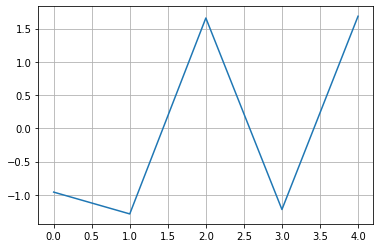

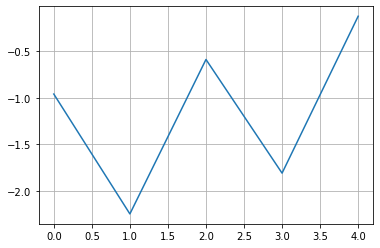

In [15]:
ts.plot()
plt.grid(True) #绘制网格
plt.show()

ts2=ts.cumsum() #累和
ts2.plot()
plt.grid(True)
plt.show()

柱状图。

          A         B         C         D
0 -1.650187 -1.561472 -0.071160 -1.448194
1 -0.094976 -1.564358  0.402798  0.261626
2  0.875853  1.102428 -0.702867 -0.975783
3 -0.170814 -0.470997  0.644934  0.546901
4 -1.068497  0.412861  0.434998  0.769164
5  0.127417 -0.460176  1.758039  1.350358
6  0.043393  0.126087  0.010271  1.196794
7  0.320432 -0.960772 -0.146576  0.750227
8 -0.290578 -1.059579 -0.735828 -2.358527
9  1.750119 -0.474483 -0.076222  0.144400


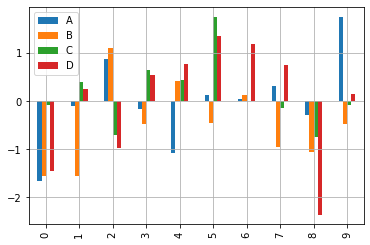

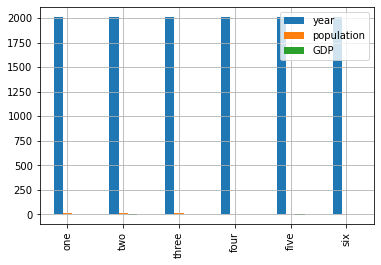

In [16]:
df1 = pd.DataFrame(np.random.randn(10, 4),columns=['A', 'B', 'C', 'D'])
print (df1)
df1.plot.bar()
plt.grid(True)
plt.show()

#随便做了个df3的柱状图。结果不太好显示。
df3.plot.bar()
plt.grid(True)
plt.show()

横着的柱状图。

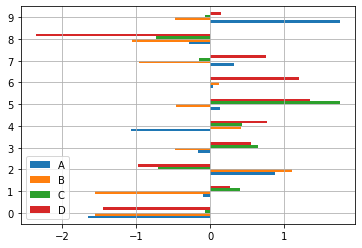

In [17]:
df1.plot.barh()
plt.grid(True)
plt.show()

柱状堆积图。（横着的和竖着的都行）

          A         B         C         D
0  0.764694  0.048894  0.619582  0.242306
1  0.613647  0.650420  0.194844  0.087820
2  0.957336  0.190676  0.590540  0.378148
3  0.046263  0.115403  0.038330  0.246203
4  0.947410  0.520837  0.144273  0.438804
5  0.418508  0.701988  0.238774  0.534211
6  0.154760  0.562749  0.440707  0.009039
7  0.103693  0.358934  0.030130  0.018952
8  0.231774  0.090813  0.790317  0.449101
9  0.802228  0.958839  0.053874  0.368820


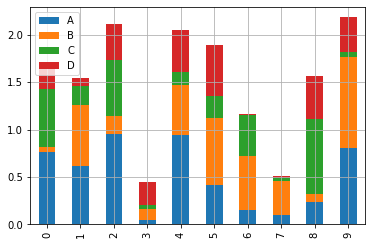

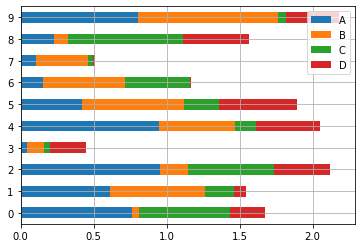

In [18]:
df2 = pd.DataFrame(np.random.rand(10,4), columns=['A','B','C','D'])
print(df2)
df2.plot.bar(stacked=True)
plt.grid(True)
plt.show()

df2.plot.barh(stacked=True)
plt.grid(True)
plt.show()

面积图。

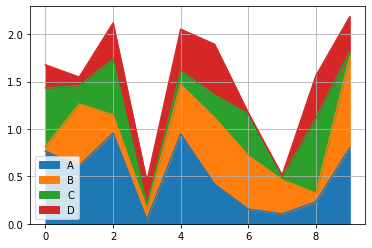

In [19]:
df2.plot.area()
plt.grid(True)
plt.show()

未堆叠的重叠图。

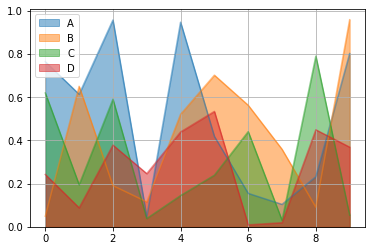

In [20]:
df2.plot.area(stacked=False)
plt.grid(True)
plt.show()

饼图。

（怀疑书上给的代码出错了）

          0
A  0.993800
B  0.104745
C  0.030021
D  0.097054


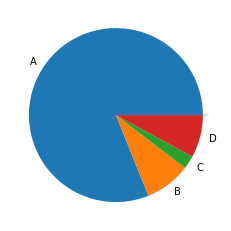

In [21]:
df3 = pd.DataFrame(np.random.rand(4), index=['A', 'B', 'C', 'D'])
print(df3)
plt.pie(df3[0],labels=df3.index)
plt.show()

In [23]:
#书上的代码
from eplot import eplot
df3 = pd.DataFrame(np.random.rand(4), index=['A', 'B', 'C', 'D'])
print(df3)
df3.eplot.pie(subplots=True)
plt.show()

          0
A  0.480074
B  0.546448
C  0.922115
D  0.705867


KeyError: None